In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [78]:
def naive_with_rc(p, t):
    """Checks occurence of genome as well as its reverse complement"""
    rev_p = reverseComplement(p)
    #print(rev_p == p)
    if rev_p == p:
        return naive(p, t)
    else:
        return naive(p, t) + naive(rev_p, t)

In [81]:
def naive_2mm(p, t):
    """Checks occurence of a genome with maximum of 2 mismatch allowed
    For eg, ACTTTA occurs twice in ACTTACTTGATAAAGT, 
    once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch.
    So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')
    should return the list [0,4].
    """
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        count = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:# compare characters
                count += 1
                if count > 2:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [59]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [60]:
def readFASTQ(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [61]:
def readFASTA(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [109]:
def readGCbyPos(reads):
    """
    Find GC content by position
    """
    gc = [0] * 100
    total = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'G' or read[i] == 'C':
                gc[i]+=1
            total[i]+=1
            
    for i in range(len(gc)):
        gc[i] /= float(total[i])
        
    return gc

In [103]:
seq, _ = readFASTQ('ERR037900_1.first1000.fastq')

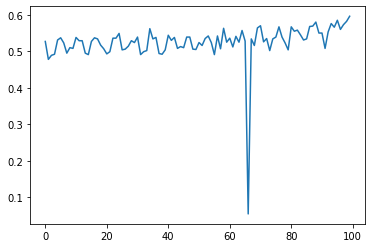

In [112]:
gc = readGCbyPos(seq)
plt.plot(range(len(gc)), gc)
plt.show()

In [115]:
print(gc[0])

0.527


In [62]:
genome = readFASTA('lambda_virus.fa')

In [105]:
print(len(seq[0]))

100


In [102]:
print(len(val))

306
